In [1]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

C:\Users\DE786\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\DE786\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
os.getcwd()

'C:\\Users\\DE786\\general_documentation\\intro_stat_learning\\notebooks'

In [2]:
data_path = os.getcwd()
input_path = r'C:\Users\ImTob\OneDrive\Desktop\Actuarial prep\Exams\MAS1 Prep\intro_stat_learning\input'
os.chdir(input_path)

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 3C13-43C3

 Directory of C:\Users\ImTob\OneDrive\Desktop\Actuarial prep\Exams\MAS1 Prep\intro_stat_learning\input

07/20/2022  12:48 PM    <DIR>          .
07/20/2022  12:48 PM    <DIR>          ..
07/20/2022  12:48 PM             6,148 .DS_Store
07/20/2022  12:48 PM             4,555 Advertising.csv
07/20/2022  12:48 PM            17,681 Auto.csv
07/20/2022  12:48 PM            30,293 Auto.data
07/20/2022  12:48 PM           626,999 Bikeshare.csv
07/20/2022  12:48 PM            34,309 Boston.csv
07/20/2022  12:48 PM             5,650 BrainCancer.csv
07/20/2022  12:48 PM         1,030,640 Caravan.csv
07/20/2022  12:48 PM            19,445 Carseats.csv
07/20/2022  12:48 PM           403,088 Ch12Ex13.csv
07/20/2022  12:48 PM            78,848 College.csv
07/20/2022  12:48 PM            17,776 Credit.csv
07/20/2022  12:48 PM           443,675 Default.csv
07/20/2022  12:48 PM         1,782,131 Fund.csv
07/20/2022  12:48 PM            1

<AxesSubplot:xlabel='Education', ylabel='Income'>

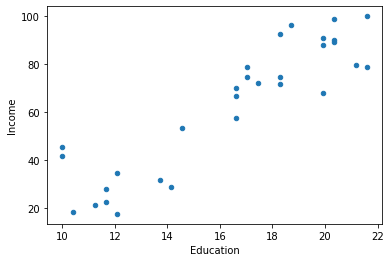

In [4]:
# df = pd.read_csv('Advertising.csv')
df = pd.read_csv('Income2.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.plot(x='Education',y='Income',kind='scatter')

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df[['Education','Seniority']], df['Income'])
lin_reg.intercept_, lin_reg.coef_

(-50.08563875473378, array([5.89555596, 0.17285547]))

In [26]:
df = pd.read_csv('Advertising.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
lin_reg = LinearRegression()
lin_reg.fit(df[['TV','radio','newspaper']], df['sales'])
lin_reg.intercept_, lin_reg.coef_

(2.9388893694594067, array([ 0.04576465,  0.18853002, -0.00103749]))

In [57]:
df.corr().loc['TV','radio']

0.05480866446583008

In [93]:
df = pd.read_csv('Credit.csv')
df = pd.get_dummies(df)
response = 'Balance'
predictors = list(set(df.columns) - set([response]))
y = df[response]
x = df[predictors]
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
ols = sm.OLS(y,sm.add_constant(x))
# ols = sm.OLS(df['sales'],sm.add_constant(df[['TV']]))
ols_result = ols.fit()
ols_result.summary()

C:\Users\ImTob\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Mon, 25 Jul 2022   Prob (F-statistic):          1.11e-253
Time:                        19:45:48   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -94.2202     12.284     -7.670      0.000    -118.372     -70.068
Married_Yes    -51.3771      8.180     -6.281      0.000     -67.460     -35.294
Student_No    -259.9838      9.100    -28.570      0.000    -277.875    -242.093
Own_Yes        -52.4367      7.828     -6.698      0.000     -67.828     -37.045
Married_No     -42.8432      7.889     -5.431      0.000     -58.353     -27.333
Education       -1.0989      1.598     -0.688      0.492      -4.241       2.043
Income          -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Age             -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Student_Yes    165.7636     11.509     14.402      0.000     143.135     188.392
Cards           17.7245      4.341      4.083      0.000       9.190      26.259
Region_West    -23.5730      8.631     -2.731      0.007     -40.542      -6.604
Region_East    -40.3772      9.113     -4.431      0.000     -58.295     -22.459
Own_No         -41.7835      7.957     -5.251      0.000     -57.427     -26.140
Limit            0.1909      0.033      5.824      0.000       0.126       0.255
Region_South   -30.2701      7.608     -3.978      0.000     -45.229     -15.311
Rating           1.1365      0.491      2.315      0.021       0.171       2.102
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     6.60e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.56e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
ols = sm.OLS(df['sales'],sm.add_constant(df[['TV','radio','newspaper']]))
# ols = sm.OLS(df['sales'],sm.add_constant(df[['TV']]))
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        15:28:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
ols_result.get_prediction

<bound method RegressionResults.get_prediction of <statsmodels.regression.linear_model.OLSResults object at 0x00000248433C3EC8>>

In [51]:
rss = np.sum((ols_result.predict() - df['sales']) ** 2)
n = len(df)
rse = np.sqrt(1/(n-2) * rss)
[rss,rse]

[2102.5305831313512, 3.2586563686504624]

In [7]:
df = pd.read_csv('College.csv')
df.rename(columns={'Unnamed: 0':'University Name'},inplace=True)
# df.set_index('University Name',inplace=True)

<Figure size 432x288 with 0 Axes>

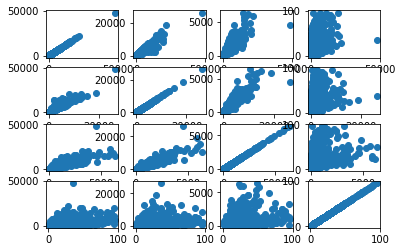

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
n=4
fig, axes = plt.subplots(n,n)
for i in range(n):
    for j in range(n):
        axes[i,j].scatter(df.iloc[:,i+2],df.iloc[:,j+2])

In [26]:
df = pd.read_csv('Credit.csv')
df.dropna(inplace=True)
y = df['Balance']
x = df[['Age','Rating','Limit']]
# x = df[['Age','Limit']]
ols = sm.OLS(y,sm.add_constant(x))
# ols = sm.OLS(df['sales'],sm.add_constant(df[['TV']]))
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     403.7
Date:                Wed, 27 Jul 2022   Prob (F-statistic):          4.84e-120
Time:                        15:11:10   Log-Likelihood:                -2739.2
No. Observations:                 400   AIC:                             5486.
Df Residuals:                     396   BIC:                             5502.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -259.5175     55.882     -4.644      0.000    -369.380    -149.655
Age           -2.3458      0.669     -3.508      0.001      -3.660      -1.031
Rating         2.3105      0.940      2.459      0.014       0.463       4.158
Limit          0.0190      0.063      0.302      0.763      -0.105       0.143
==============================================================================
Omnibus:                       20.764   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.727
Skew:                           0.360   Prob(JB):                     4.74e-08
Kurtosis:                       4.227   Cond. No.                     2.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = sm.add_constant(x)
pd.Series([variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], 
              index=x.columns)

const      23.802955
Age         1.011385
Rating    160.668301
Limit     160.592880
dtype: float64